# .....................................Data Visulization.......................................................

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('Big Basket Food Delivery.csv',encoding='latin-1')

In [40]:
df2 = pd.read_excel('Country-Code.xlsx')

In [65]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [41]:
df = pd.merge(df1, df2, on='Country Code')

In [42]:
df.to_csv('merged_file.csv')

### Bar plot :

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.


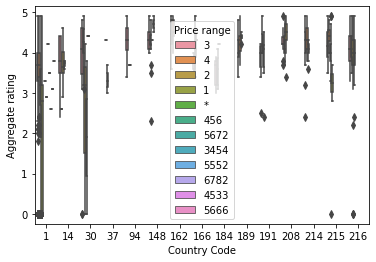

In [43]:
# Create the plot
sns.boxplot(x='Country Code', y='Aggregate rating', hue='Price range', data=df)

# Show the plot
plt.show()

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

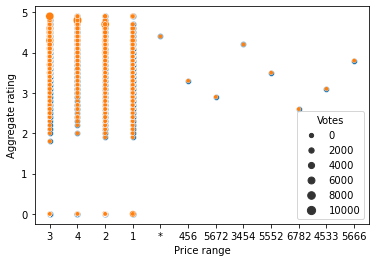

In [67]:
# Scatter plot
sns.scatterplot(x='Price range', y='Aggregate rating', data=df)

# Bubble chart
sns.scatterplot(x='Price range', y='Aggregate rating', size='Votes', data=df)

this graph shows that Overall, the scatter plot shows the relationship between 'Price range' and 'Aggregate rating' without considering the number of 'Votes',

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

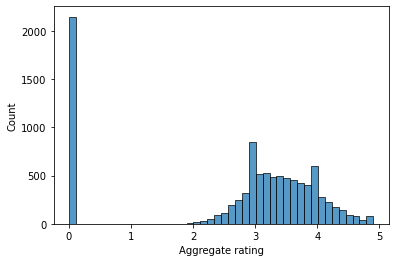

In [45]:
# Histogram
sns.histplot(data=df, x='Aggregate rating')


In [47]:
df1 = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df1

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


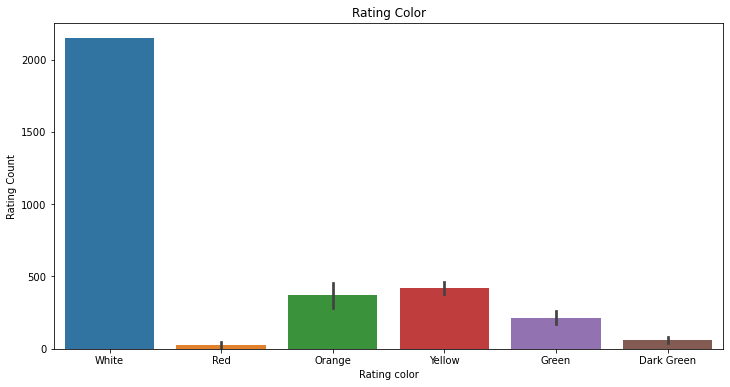

In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df1['Rating color'], y=df1['Rating Count']);

from the above plot we can say that Maximum restaurants seems to have gone No ratings.
where the x-axis represents the different colors of restaurant ratings and the y-axis represents the number of restaurants for each rating color.

([<matplotlib.patches.Wedge at 0x1d9d5f632b0>,
 [Text(-0.7614681082348078, 0.7938301582462732, 'No'),
  Text(0.7614681825585476, -0.7938300869524803, 'Yes')],
 [Text(-0.41534624085534966, 0.4329982681343308, '74.34%'),
  Text(0.41534628139557145, -0.43299822924680736, '25.66%')])

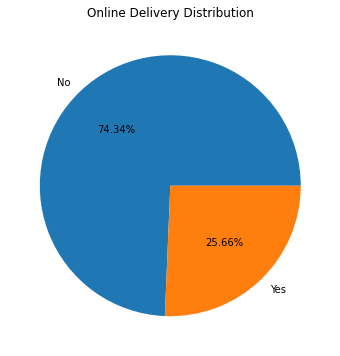

In [49]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['Has Online delivery'].value_counts()/9551*100, labels=df['Has Online delivery'].value_counts().index, autopct='%.2f%%')

C:\Users\91944\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91944\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91944\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


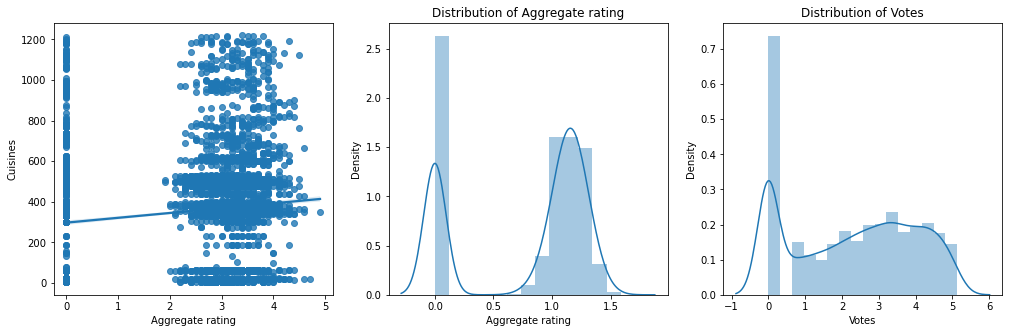

In [50]:
import csv
import math
import matplotlib.pyplot as plt
import seaborn as sns

with open('cleaned_data2.csv', encoding='latin-1') as file:
    reader = csv.DictReader(file)
    data = list(reader)

# Extract Aggregate rating and Cuisines data
Aggregate_rating = [float(row['Aggregate rating']) for row in data]
Cuisines = [float(row['Cuisines']) for row in data]

# Plot regression between Aggregate rating and Cuisines
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
plt.xlabel('Aggregate rating')
plt.ylabel('Cuisines')
sns.regplot(Aggregate_rating, Cuisines)

# Plot distribution of Aggregate rating
plt.subplot(1,3,2)
Aggregate_rating_log = [math.log(rating) if rating > 0 else 0 for rating in Aggregate_rating]
plt.xlabel('Aggregate rating')
sns.distplot(Aggregate_rating_log)
plt.title('Distribution of Aggregate rating')

# Plot distribution of Votes
plt.subplot(1,3,3)
votes = [float(row['Votes']) for row in data]
votes_log = [math.log(vote) if vote > 0 else 0 for vote in votes]
plt.xlabel('Votes')
sns.distplot(votes_log)
plt.title('Distribution of Votes')

# Show the plot
plt.show()


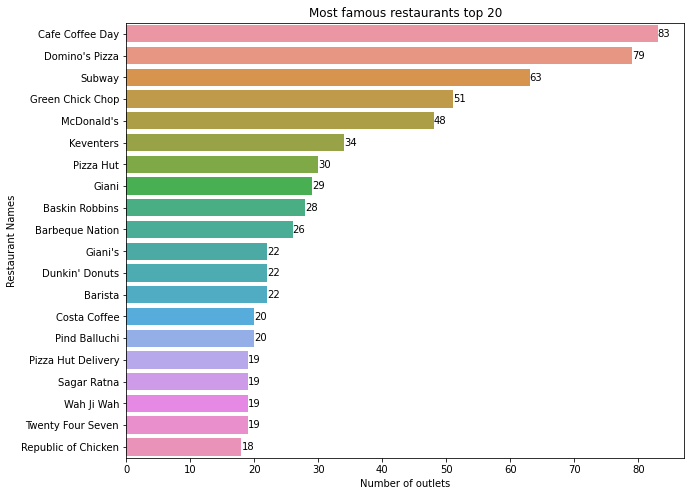

In [51]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = df['Restaurant Name'].value_counts()[:20].values, y =df['Restaurant Name'].value_counts()[:20].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Most famous restaurants top 20')
plt.xlabel('Number of outlets')
plt.ylabel('Restaurant Names')
plt.show()



Text(0.5, 0.98, 'Online Order Availability')

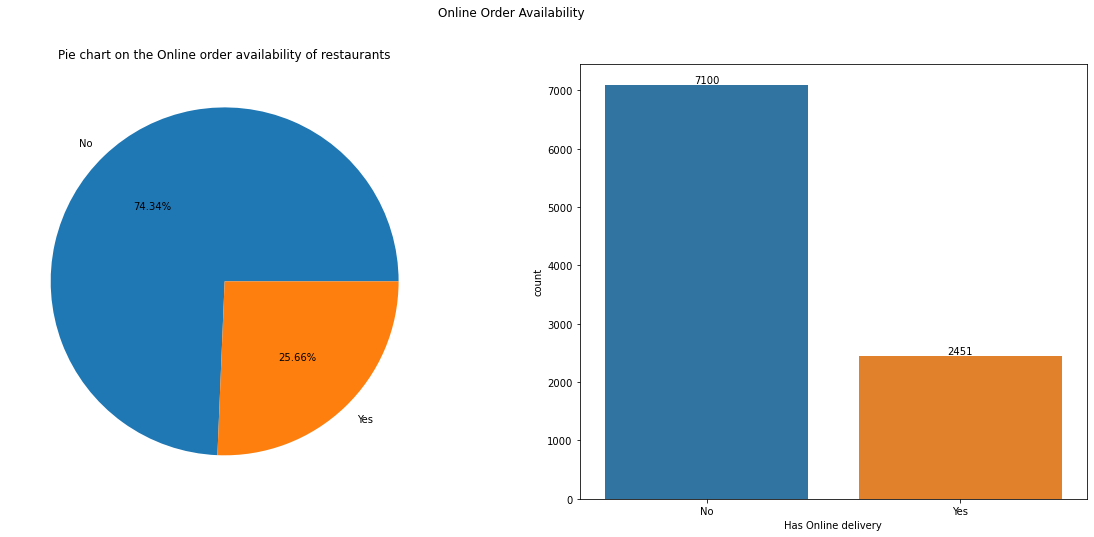

In [52]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(df['Has Online delivery'].value_counts(), labels=df['Has Online delivery'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the Online order availability of restaurants')
plt.subplot(122)
ax = sns.countplot(data=df, x = 'Has Online delivery')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Has Online delivery')
plt.suptitle('Online Order Availability')



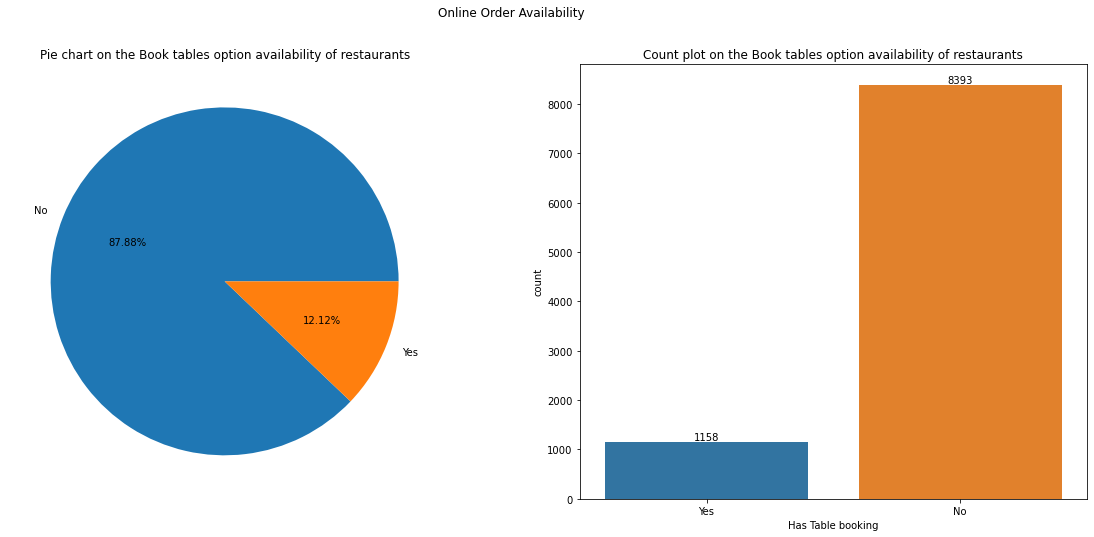

In [53]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(df['Has Table booking'].value_counts(), labels=df['Has Table booking'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the Book tables option availability of restaurants')
plt.subplot(122)
ax = sns.countplot(data=df, x = 'Has Table booking')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count plot on the Book tables option availability of restaurants')
plt.suptitle('Online Order Availability')
plt.show()



In [ ]:
From the above pie chart we can say that Only 12% of restaurants accepts booking table facility.

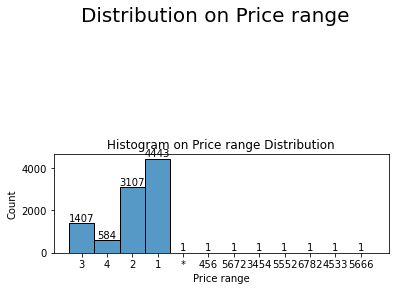

<Figure size 576x576 with 0 Axes>

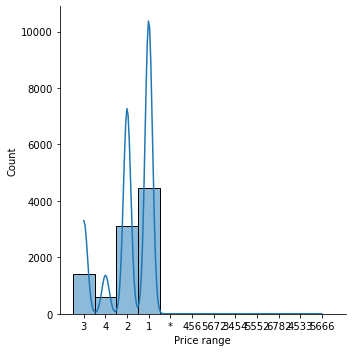

In [54]:
plt.subplot(2,1,2)
ax = sns.histplot(x=df['Price range'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Histogram on Price range Distribution')
plt.suptitle('Distribution on Price range', fontsize=20)
plt.show()

# Subplot 2 - Density plot
plt.figure(figsize=(8,8))
sns.displot(df['Price range'], kde=True)
plt.show()


In [55]:
Liked_Dish = list()
for dishes in range(df.shape[0]):
    dish =df['Rating text'][dishes].split(',')
    for d in dish:
        Liked_Dish.append(d)



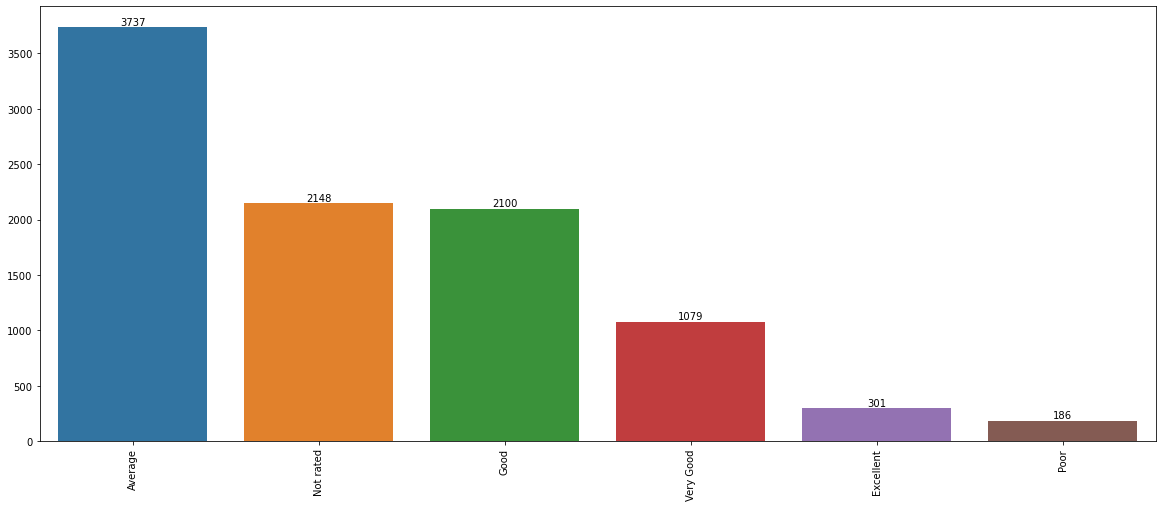

In [56]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pd.Series(Liked_Dish).value_counts()[:30].index, y = pd.Series(Liked_Dish).value_counts()[:30].values)
for i in ax.containers:
    ax.bar_label(i,)
    plt.xticks(rotation = 90)
plt.show()



Text(0.5, 0.98, 'Type of Restaurants')

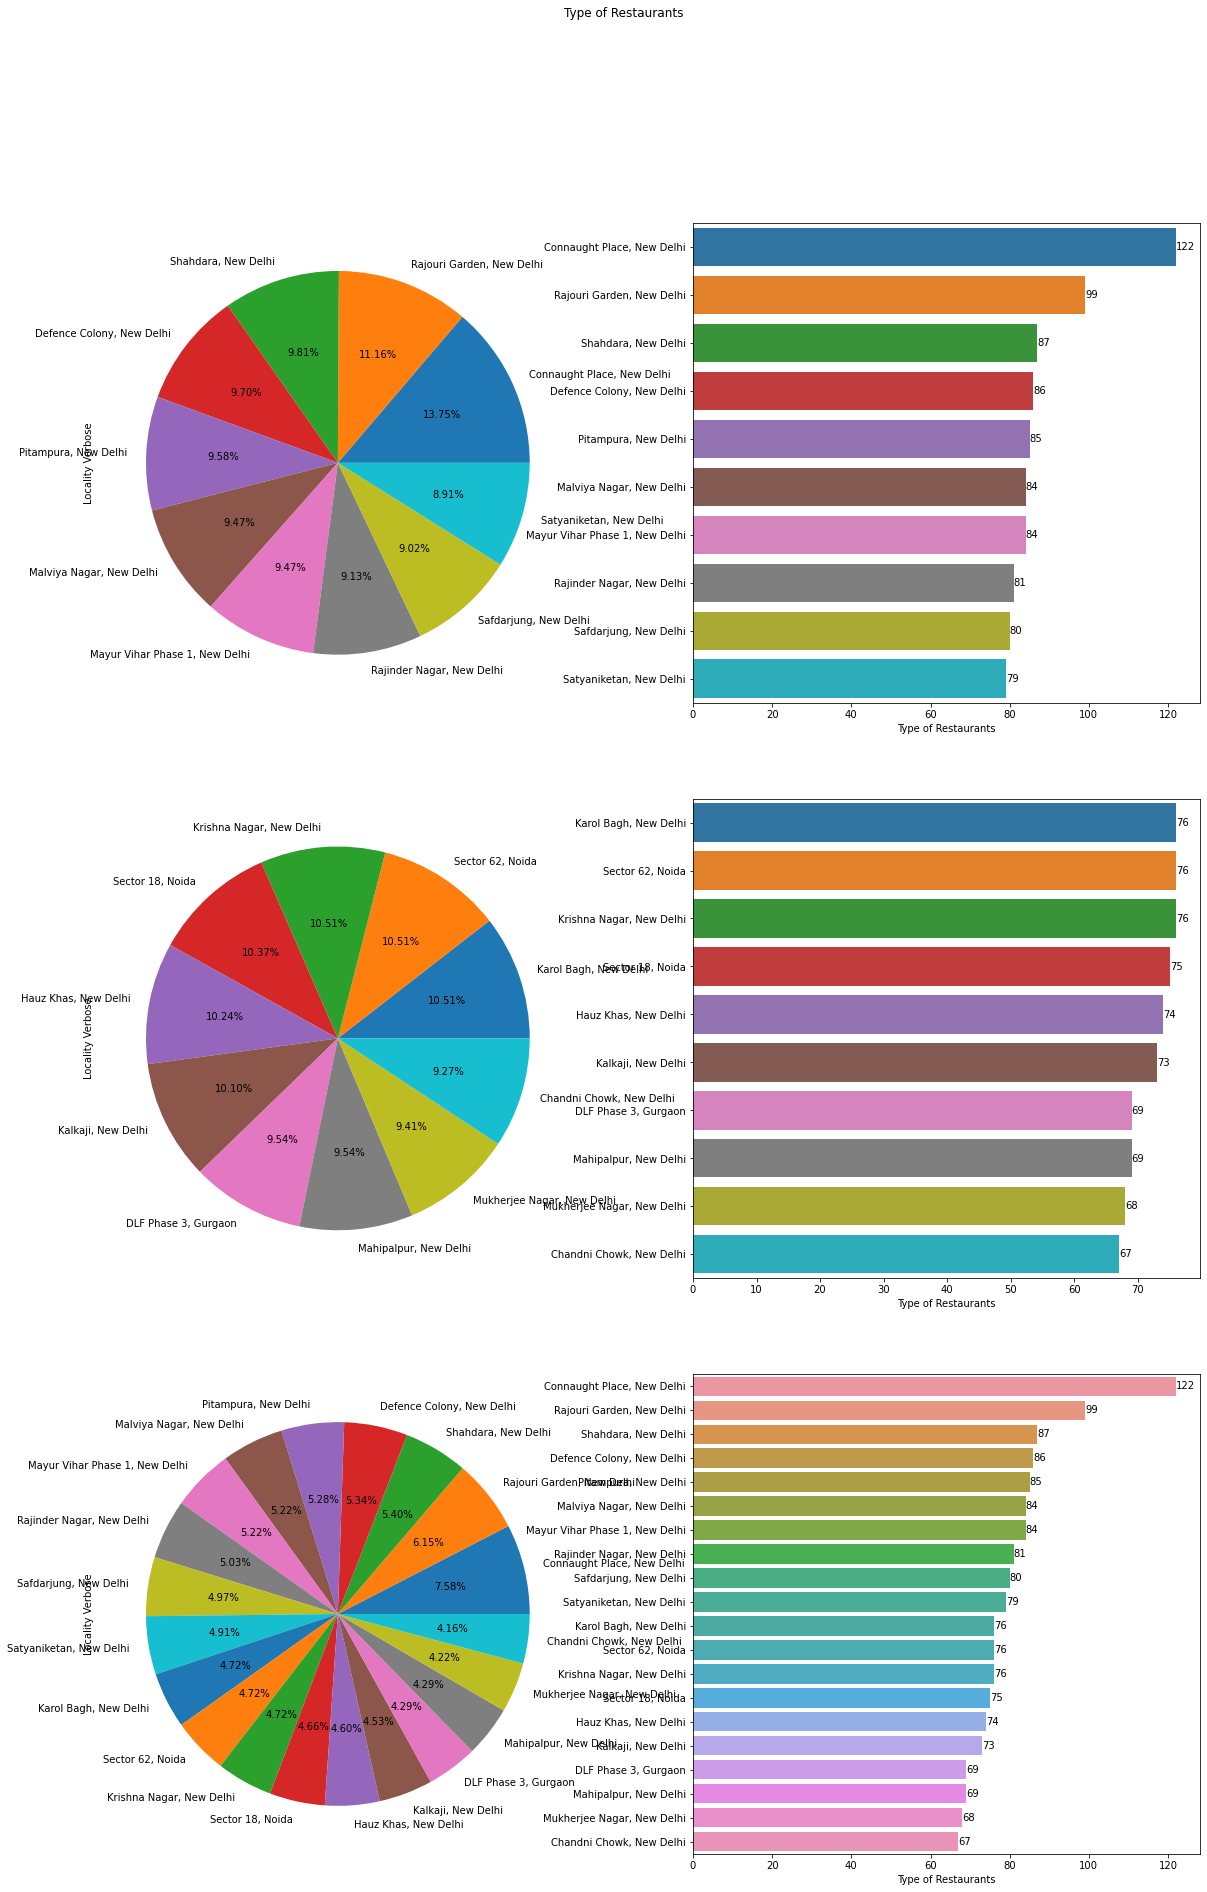

In [57]:
plt.figure(figsize=(20,30))
plt.subplot(321)
df['Locality Verbose'].value_counts()[:10].plot.pie(autopct = '%.2f%%')
plt.subplot(322)
ax = sns.barplot(x = df['Locality Verbose'].value_counts()[:10].values, y =df['Locality Verbose'].value_counts()[:10].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')
plt.subplot(323)
df['Locality Verbose'].value_counts()[10:20].plot.pie(autopct = '%.2f%%')
plt.subplot(324)
ax = sns.barplot(x = df['Locality Verbose'].value_counts()[10:20].values, y =df['Locality Verbose'].value_counts()[10:20].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')
plt.subplot(325)
df['Locality Verbose'].value_counts()[0:20].plot.pie(autopct = '%.2f%%')
plt.subplot(326)
ax = sns.barplot(x = df['Locality Verbose'].value_counts()[0:20].values, y =df['Locality Verbose'].value_counts()[0:20].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')


plt.suptitle('Type of Restaurants')



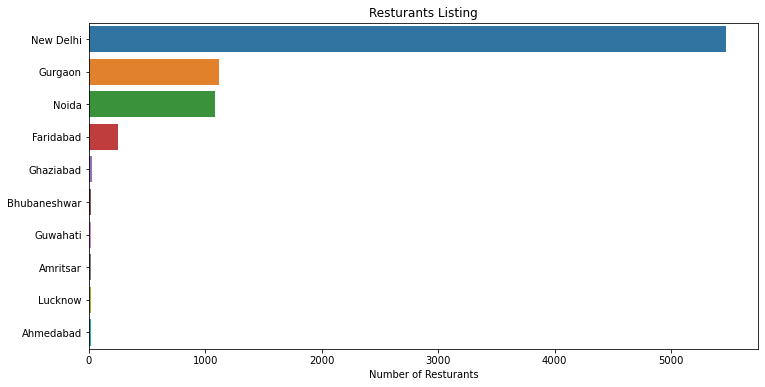

In [61]:
df3 = df[(df.Country == 'India')]
plt.figure(figsize=(12,6))
sns.barplot(x=df.City.value_counts().head(10), y=df.City.value_counts().head(10).index)

#plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing');

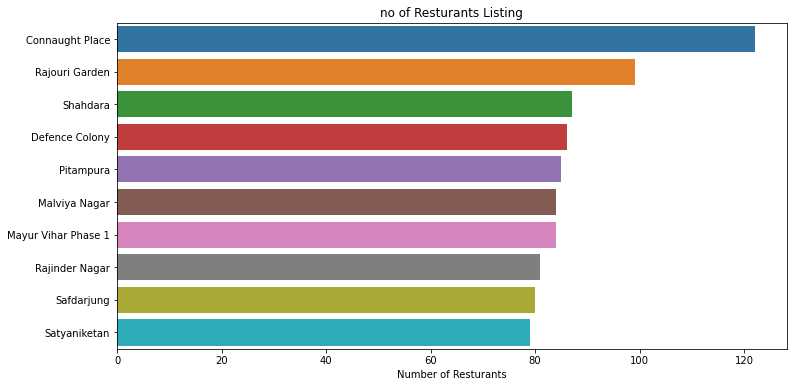

In [64]:
df3 = df[(df.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=df3.Locality.value_counts().head(10), y=df3.Locality.value_counts().head(10).index)

#plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('no of Resturants Listing');

## Correlation :

In statistics, correlation refers to the degree to which two variables are related to each other. 

A positive correlation means that as one variable increases, the other variable also tends to increase. 

A negative correlation means that as one variable increases, the other variable tends to decrease.

### What is heatmap:

Heatmap is a graphical representation of 2D (two dimensional) data. Each data value represents in a matrix and it has a special color. The color of the matrix is dependent on value. Normally, low-value show in low-intensity color and high-value show in hight-intensity color format.


In [62]:
# Step 1: Load the dataset into a Python environment
with open('cleaned_data2.csv',  encoding='latin-1') as f:
    reader = csv.reader(f)
    data = list(reader)

# Step 2: Remove rows containing missing values
clean_data = []
for row in data:
    if '' or 'NA' not in row:
        clean_data.append(row)


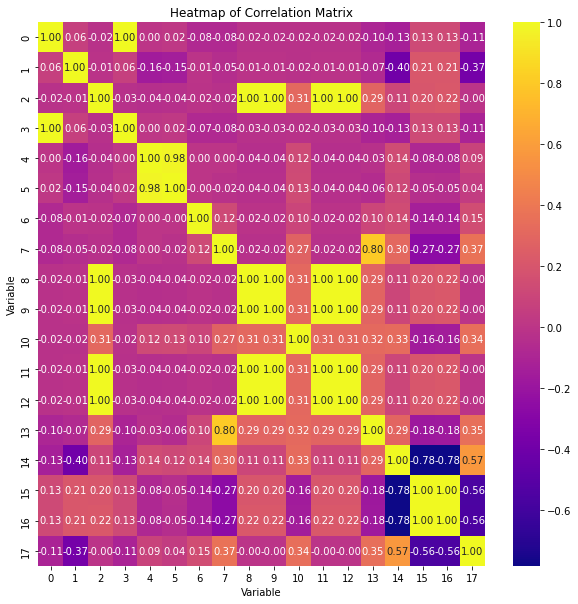

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume the 'data' list contains string and float values
numeric_data = []
mapping = {}
counter = 1

# Iterate through each row in the data
for row in clean_data:
    numeric_row = []
    for value in row:
        # If the value is a string and hasn't been mapped yet, map it to a new numerical value
        if isinstance(value, str) and value not in mapping:
            mapping[value] = counter
            counter += 1
        # Convert the value to a numerical value and add it to the list of values for this row
        try:
            numeric_row.append(float(value))
        except ValueError:
            numeric_row.append(mapping[value])
    numeric_data.append(numeric_row)

# Convert the numeric data to a NumPy array
numeric_data = np.array(numeric_data)

# Compute the correlation matrix
corr_matrix = np.corrcoef(numeric_data, rowvar=False)

# Create a heatmap of the correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, ax=ax, cmap='plasma', annot=True, fmt='.2f')

# Set the plot title and axis labels
ax.set_title('Heatmap of Correlation Matrix')
ax.set_xlabel('Variable')
ax.set_ylabel('Variable')

# Show the plot
plt.show()